In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
import ligtools
import corner
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
ligs = ligtools.dilser()

In [7]:
sats = ligtools.klotz1(2.0,ligs)

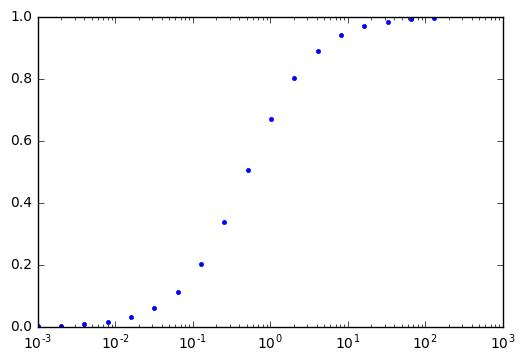

In [8]:
plt.semilogx(ligs,sats,'.')

In [10]:
np.random.normal([1.,100.,1000.],[0.05,5.,50.])

array([   1.06414883,  107.11825162,  887.29172575])

In [12]:
satr = np.random.normal(sats,(0.05*sats))

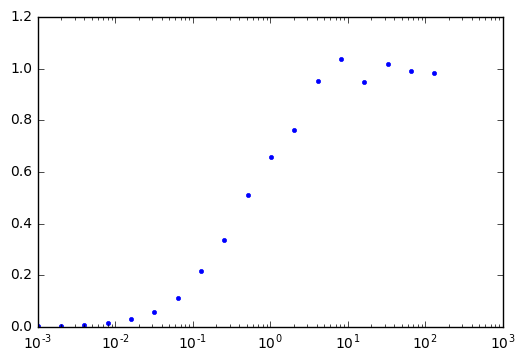

In [13]:
plt.semilogx(ligs,satr,'.')

In [14]:
satr_set = np.array([np.random.normal(sats,(0.05*sats)) for i in range(100)])

In [16]:
satr_set.mean(axis=0)

array([ 0.00200319,  0.00400754,  0.00796041,  0.01573858,  0.03100757,
        0.06006071,  0.11304841,  0.20379845,  0.3381096 ,  0.50915628,
        0.66504822,  0.80348284,  0.89470909,  0.94853093,  0.97489867,
        0.98913778,  0.98106066,  1.00336793])

In [18]:
satr_set.std(axis=0)

array([  9.51517250e-05,   2.00505947e-04,   3.92484116e-04,
         7.54979829e-04,   1.83068295e-03,   2.81215224e-03,
         5.85620538e-03,   1.03930606e-02,   1.66305118e-02,
         2.47341506e-02,   3.23751769e-02,   3.89475368e-02,
         3.96846949e-02,   4.54145398e-02,   4.83352954e-02,
         4.79439319e-02,   5.57695397e-02,   4.70849581e-02])

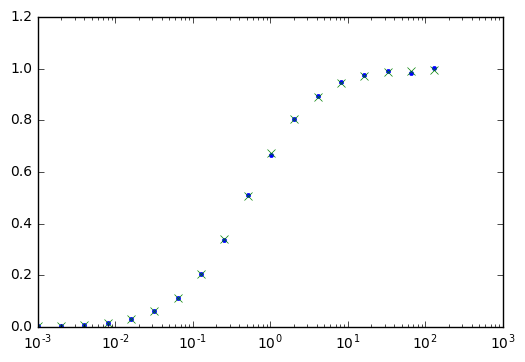

In [21]:
plt.semilogx(ligs,satr_set.mean(axis=0),'.')
plt.semilogx(ligs,sats,'x')

In [23]:
(satr_set.std(axis=0)/satr_set.mean(axis=0)).mean()

0.049580266569301097

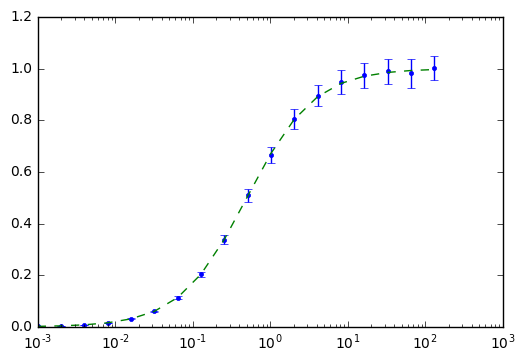

In [32]:
plt.errorbar(ligs,satr_set.mean(axis=0),satr_set.std(axis=0),linestyle='none',fmt='.')
plt.plot(ligs,sats,'--')
plt.xscale('log')

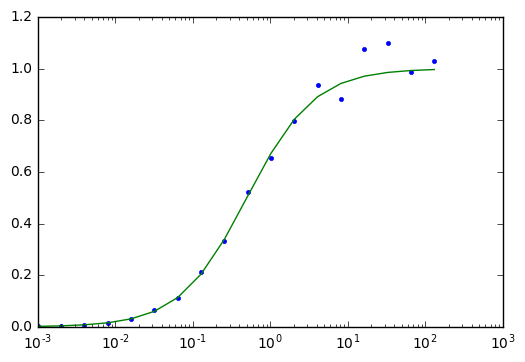

In [35]:
plt.semilogx(ligs,satr_set[5],'.')
plt.semilogx(ligs,sats,'-')

In [53]:
meanholder = []
stdholder = []
for i in range(1000):
    dat = np.array([np.random.normal(sats,(0.05*sats)) for i in range(3)])
    meanholder.append(dat.mean(axis=0))
    stdholder.append(dat.std(axis=0))
meanholder = np.array(meanholder)
stdholder = np.array(stdholder)

In [54]:
stdholder[1]/meanholder[1]

array([ 0.0192676 ,  0.05242102,  0.03697234,  0.03961675,  0.0252123 ,
        0.02019941,  0.01876007,  0.04501127,  0.04794623,  0.04011884,
        0.04674381,  0.01732377,  0.01692061,  0.01191728,  0.03530454,
        0.01537089,  0.03335906,  0.05127168])

In [55]:
singholder = []
for i in range(1000):
    singholder.append(np.random.normal(sats,(0.05*sats)))
singholder = np.array(singholder)

(array([   6.,   15.,   74.,  171.,  279.,  244.,  138.,   64.,    8.,    1.]),
 array([ 0.00179903,  0.00183954,  0.00188006,  0.00192057,  0.00196108,
         0.0020016 ,  0.00204211,  0.00208262,  0.00212314,  0.00216365,
         0.00220416]),
 <a list of 10 Patch objects>)

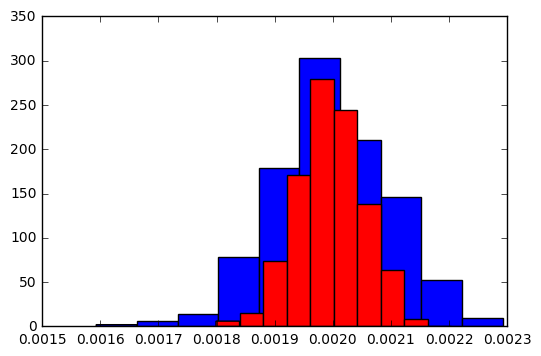

In [58]:
plt.hist(singholder[:,0])
plt.hist(meanholder[:,0],color='red')

In [66]:
meanholder[:,0].std()

5.7382068746647129e-05

In [65]:
singholder[:,0].std()

9.8750586710073728e-05

In [87]:
dats = np.array([np.array([np.random.normal(sats,(0.05*sats)) for i in range(3)]) for i in range(10000)])

In [77]:
dat[0].std(axis=0) / dat[0].mean(axis=0)

array([ 0.04018533,  0.0422891 ,  0.02034097,  0.01390876,  0.03822663,
        0.02539303,  0.02127989,  0.024962  ,  0.05019422,  0.02937789,
        0.02407379,  0.04358004,  0.01537741,  0.0323142 ,  0.03449493,
        0.00801101,  0.03251713,  0.00447232])

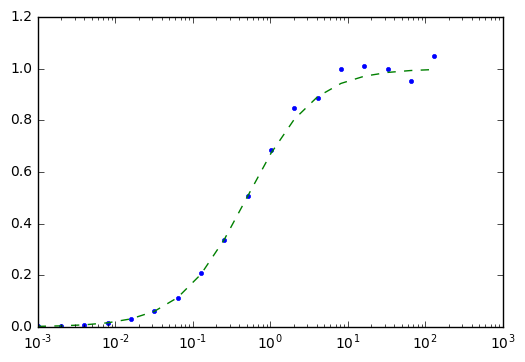

In [82]:
plt.semilogx(ligs,dat[4].mean(axis=0),'.')
plt.semilogx(ligs,sats,'--')

In [92]:
dats.shape[0]

10000

In [93]:
dats_means = np.array([dats[i].mean(axis=0) for i in range(dats.shape[0])])

In [94]:
dats_means[0]

array([ 0.00201624,  0.00396402,  0.00746316,  0.01551423,  0.03145773,
        0.05668021,  0.11137154,  0.20442587,  0.34701167,  0.50931637,
        0.7110616 ,  0.81019513,  0.91513824,  0.92309874,  0.95824912,
        1.00841561,  0.95196861,  1.01314712])

In [96]:
dats_means.shape

(10000, 18)

In [97]:
parm = np.array([0.6])

In [98]:
bound1 = ((0.),(10.))

In [100]:
resset = [optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,dats_means[i])) for i in range(dats_means.shape[0])]

In [102]:
len(resset)

10000

In [106]:
resset[6].x

array([ 1.93873787])

In [107]:
resset_wt = [optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,dats_means[i],(dats_means[i]*0.05))) for i in range(dats_means.shape[0])]

In [108]:
ests = np.array([resset[i].x for i in range(len(resset))])

In [109]:
ests[6]

array([ 1.93873787])

In [110]:
ests_wt = np.array([resset_wt[i].x for i in range(len(resset))])

In [111]:
ests.mean()

2.0006691769463254

In [112]:
ests_wt.mean()

1.9962831412165412

In [113]:
hold = np.hstack([ests,ests_wt])

In [114]:
hold

array([[ 2.1100439 ,  1.97579476],
       [ 2.12024826,  2.02242479],
       [ 1.97388801,  2.01263531],
       ..., 
       [ 1.95775449,  1.98892404],
       [ 1.91821112,  1.9938646 ],
       [ 1.92975048,  1.98892045]])

{'boxes': [<matplotlib.lines.Line2D at 0x11835ba58>,
 'caps': [<matplotlib.lines.Line2D at 0x118384a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1183939e8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11838cb00>,
 'whiskers': [<matplotlib.lines.Line2D at 0x118356828>,
  <matplotlib.lines.Line2D at 0x118399ba8>]}

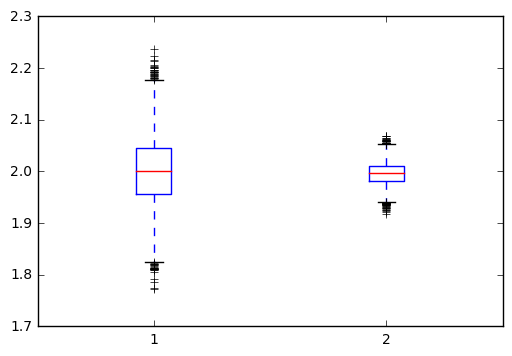

In [115]:
plt.boxplot(hold)

In [120]:
  dats[0].std(axis=0)/dats[0].mean(axis=0)

array([ 0.06557468,  0.02216892,  0.03541115,  0.03177004,  0.03250443,
        0.00716055,  0.03023544,  0.02090031,  0.0426439 ,  0.07603177,
        0.0326249 ,  0.07597751,  0.04078639,  0.0261039 ,  0.0269495 ,
        0.02036168,  0.04644482,  0.03328113])

In [121]:
dats_std = np.array([dats[i].std(axis=0) for i in range(dats.shape[0])])

In [122]:
dats_std[1]

array([  4.52033604e-05,   2.48658167e-05,   1.37382592e-04,
         7.08670765e-04,   7.29436318e-04,   1.30258647e-03,
         6.00797568e-03,   7.32508340e-03,   5.96236057e-03,
         1.73741642e-02,   3.28124332e-02,   3.50939059e-02,
         2.63049414e-02,   3.42041056e-02,   1.89124193e-02,
         4.25186728e-02,   3.96677676e-02,   4.25582591e-02])

In [124]:
resset_tru_wt = [optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,dats_means[i],dats_std[i])) for i in range(dats_means.shape[0])]

In [126]:
ests_tru_wt = np.array([resset_tru_wt[i].x for i in range(len(resset_tru_wt))])

In [127]:
hold = np.hstack([ests,ests_wt,ests_tru_wt])

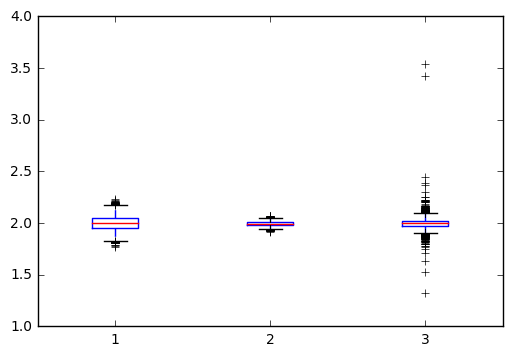

In [135]:
bplot = plt.boxplot(hold)

In [129]:
hold

array([[ 2.1100439 ,  1.97579476,  1.90885742],
       [ 2.12024826,  2.02242479,  2.08087796],
       [ 1.97388801,  2.01263531,  2.04149327],
       ..., 
       [ 1.95775449,  1.98892404,  1.98037092],
       [ 1.91821112,  1.9938646 ,  1.97098313],
       [ 1.92975048,  1.98892045,  2.00461949]])

In [132]:
print(ests.mean(),np.median(ests))

2.00066917695 2.00012491687


In [133]:
print(ests_wt.mean(),np.median(ests_wt))

1.99628314122 1.99622513417


In [134]:
print(ests_tru_wt.mean(),np.median(ests_tru_wt))

1.99969355911 1.9992205585


In [137]:
bplot.values()

dict_values([[<matplotlib.lines.Line2D object at 0x1197fec50>, <matplotlib.lines.Line2D object at 0x119801c18>, <matplotlib.lines.Line2D object at 0x11980dd30>, <matplotlib.lines.Line2D object at 0x11980deb8>, <matplotlib.lines.Line2D object at 0x119818fd0>, <matplotlib.lines.Line2D object at 0x11981ceb8>], [<matplotlib.lines.Line2D object at 0x119801da0>, <matplotlib.lines.Line2D object at 0x119807c88>, <matplotlib.lines.Line2D object at 0x119811da0>, <matplotlib.lines.Line2D object at 0x119811f28>, <matplotlib.lines.Line2D object at 0x11981cfd0>, <matplotlib.lines.Line2D object at 0x119820f28>], [<matplotlib.lines.Line2D object at 0x1197fe9e8>, <matplotlib.lines.Line2D object at 0x11980add8>, <matplotlib.lines.Line2D object at 0x119818748>], [<matplotlib.lines.Line2D object at 0x11980acf8>, <matplotlib.lines.Line2D object at 0x119814f98>, <matplotlib.lines.Line2D object at 0x119824f98>], [], [<matplotlib.lines.Line2D object at 0x119807e10>, <matplotlib.lines.Line2D object at 0x119814

In [143]:
a = bplot.get('fliers')[0]

In [144]:
type(a)

matplotlib.lines.Line2D

AttributeError: 'Line2D' object has no attribute 'xdata'

In [147]:
bplot.values()

dict_values([[<matplotlib.lines.Line2D object at 0x1197fec50>, <matplotlib.lines.Line2D object at 0x119801c18>, <matplotlib.lines.Line2D object at 0x11980dd30>, <matplotlib.lines.Line2D object at 0x11980deb8>, <matplotlib.lines.Line2D object at 0x119818fd0>, <matplotlib.lines.Line2D object at 0x11981ceb8>], [<matplotlib.lines.Line2D object at 0x119801da0>, <matplotlib.lines.Line2D object at 0x119807c88>, <matplotlib.lines.Line2D object at 0x119811da0>, <matplotlib.lines.Line2D object at 0x119811f28>, <matplotlib.lines.Line2D object at 0x11981cfd0>, <matplotlib.lines.Line2D object at 0x119820f28>], [<matplotlib.lines.Line2D object at 0x1197fe9e8>, <matplotlib.lines.Line2D object at 0x11980add8>, <matplotlib.lines.Line2D object at 0x119818748>], [<matplotlib.lines.Line2D object at 0x11980acf8>, <matplotlib.lines.Line2D object at 0x119814f98>, <matplotlib.lines.Line2D object at 0x119824f98>], [], [<matplotlib.lines.Line2D object at 0x119807e10>, <matplotlib.lines.Line2D object at 0x119814

In [148]:
a.values

AttributeError: 'Line2D' object has no attribute 'values'

In [159]:
a = bplot['fliers'][2].get_ydata()

In [156]:
a = np.array([1,2,3,4])

In [157]:
np.where(a==4)

(array([3]),)

In [158]:
np.where(ests_tru_wt==2.2216576)

(array([], dtype=int64), array([], dtype=int64))

In [169]:
for i in a[0:5]:
    print(np.where(ests_tru_wt==i)[0][0])

290
508
610
615
651


In [176]:
np.percentile(ests_tru_wt,[25,75])

array([ 1.97604577,  2.02298658])

In [174]:
a.sort()

In [178]:
iqr = np.percentile(ests_tru_wt,[25,75])[1] - np.percentile(ests_tru_wt,[25,75])[0]

In [179]:
iqr

0.046940813902383915

In [180]:
iqr * 1.5

0.070411220853575873

In [181]:
fq = np.percentile(ests_tru_wt,25)

In [183]:
uq = np.percentile(ests_tru_wt,75)

In [185]:
iqr = uq-fq

In [186]:
iqr

0.046940813902383915

In [187]:
uq + (1.5*iqr)

2.093397803136166

In [188]:
fq-(1.5*iqr)

1.9056345475266303

In [189]:
a

array([ 1.32133106,  1.52406163,  1.62853535,  1.71283853,  1.75135363,
        1.77091701,  1.77815302,  1.78159994,  1.79359014,  1.79822237,
        1.80015345,  1.80091884,  1.81183098,  1.81267785,  1.81359406,
        1.82198577,  1.82671743,  1.82872546,  1.82891974,  1.83152418,
        1.83159496,  1.83968913,  1.83980696,  1.84214863,  1.84400531,
        1.84614786,  1.84712788,  1.84831093,  1.85043445,  1.85117541,
        1.8558189 ,  1.85687884,  1.85863065,  1.8593463 ,  1.86014131,
        1.86031192,  1.86535112,  1.86535454,  1.86616312,  1.86633479,
        1.86703682,  1.86835706,  1.86924861,  1.86993363,  1.87024518,
        1.87090569,  1.87111243,  1.87156474,  1.87171722,  1.87220495,
        1.87270962,  1.87315218,  1.87462374,  1.87520008,  1.87551404,
        1.87577056,  1.87640026,  1.87652092,  1.87657849,  1.87726032,
        1.87792173,  1.87845464,  1.87956691,  1.87966606,  1.87976362,
        1.88001946,  1.8801124 ,  1.88182291,  1.88204784,  1.88

In [190]:
a = bplot['fliers'][2].get_ydata()

In [191]:
a

array([ 1.32133106,  1.52406163,  1.62853535,  1.71283853,  1.75135363,
        1.77091701,  1.77815302,  1.78159994,  1.79359014,  1.79822237,
        1.80015345,  1.80091884,  1.81183098,  1.81267785,  1.81359406,
        1.82198577,  1.82671743,  1.82872546,  1.82891974,  1.83152418,
        1.83159496,  1.83968913,  1.83980696,  1.84214863,  1.84400531,
        1.84614786,  1.84712788,  1.84831093,  1.85043445,  1.85117541,
        1.8558189 ,  1.85687884,  1.85863065,  1.8593463 ,  1.86014131,
        1.86031192,  1.86535112,  1.86535454,  1.86616312,  1.86633479,
        1.86703682,  1.86835706,  1.86924861,  1.86993363,  1.87024518,
        1.87090569,  1.87111243,  1.87156474,  1.87171722,  1.87220495,
        1.87270962,  1.87315218,  1.87462374,  1.87520008,  1.87551404,
        1.87577056,  1.87640026,  1.87652092,  1.87657849,  1.87726032,
        1.87792173,  1.87845464,  1.87956691,  1.87966606,  1.87976362,
        1.88001946,  1.8801124 ,  1.88182291,  1.88204784,  1.88

In [194]:
np.where(ests_tru_wt==a[1])[0][0]

7323

In [196]:
inds = [np.where(ests_tru_wt==a[i])[0][0] for i in range(len(a))]

In [199]:
flier_sets = np.array([dats_means[i] for i in inds])

In [200]:
flier_stds = np.array([dats_std[i] for i in inds])

In [202]:
np.mean(flier_stds/flier_sets)

0.035723542531546713

In [204]:
testar = np.array([1,2,3,2,5,6])

In [207]:
inds1 = np.where(testar == 2)[0]

In [208]:
np.delete(testar,inds1)

array([1, 3, 5, 6])

In [209]:
testar

array([1, 2, 3, 2, 5, 6])

In [210]:
nonfliers = np.delete(ests_tru_wt,inds)

In [214]:
nonfliers.size

9699

In [217]:
len(inds)

301